<a href="https://colab.research.google.com/github/mrmendapara/Python-ML/blob/master/SuperconductDataset_UCIMLRepository_Polynomial_Regression_Manthan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00464/superconduct.zip

--2019-06-19 17:22:27--  https://archive.ics.uci.edu/ml/machine-learning-databases/00464/superconduct.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8300005 (7.9M) [application/x-httpd-php]
Saving to: ‘superconduct.zip’

superconduct.zip    100%[===================>]   7.92M  13.0MB/s    in 0.6s    

2019-06-19 17:22:27 (13.0 MB/s) - ‘superconduct.zip’ saved [8300005/8300005]



In [5]:
!unzip superconduct.zip

Archive:  superconduct.zip
  inflating: unique_m.csv            
  inflating: train.csv               


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random

In [0]:
data = pd.read_csv("train.csv")

In [9]:
target = data['critical_temp']
target = np.array(target)
target = target.reshape(1,len(target))
target.shape

(1, 21263)

In [10]:
feature = data.drop('critical_temp', axis=1).copy()
feature = np.array(feature)
feature.shape

(21263, 81)

In [20]:
p = np.random.randint(1,20,len(feature.T))
p = p.reshape(len(feature.T),1)
p.shape

(81, 1)

In [0]:
feature=feature/feature.max()
target=target/target.max()

In [0]:
def curve(m,x,c):
    return np.dot(m,(x.T)**p)+c
def error(m,x,c,y):
    return np.mean((curve(m,x,c)-y)**2)
def der_slope(m,x,c,y):
    return 2*np.mean((np.multiply((curve(m,x,c)-y),x.T**p)),axis=1)
def der_int(m,x,c,y):
    return 2*np.mean(curve(m,x,c)-y)

error: 0.12479285290821708
iteration : 99


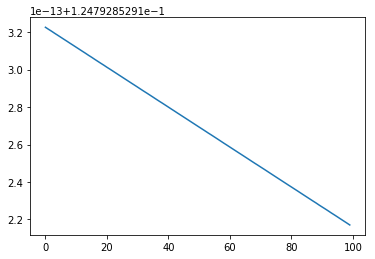

In [22]:
m = np.random.randn(1,len(feature.T))
c = random.random()
it=100
lr=0.0000000000001
cost=[]

for i in range(it):
    m=m-lr*der_slope(m,feature,c,target)
    c=c-lr*der_int(m,feature,c,target)
    cost.append(error(m,feature,c,target))
    clear_output(True)
    print('error:',error(m,feature,c,target))
    print('iteration :',i)
plt.plot(cost)
plt.show()